In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Loan_Train for Financial Analytics.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

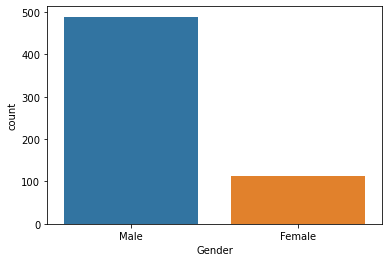

In [6]:
# Create a count plot of loan status
sns.countplot(x='Gender',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

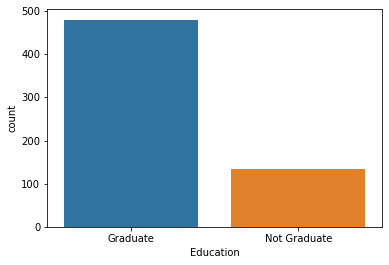

In [7]:
sns.countplot(x='Education',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

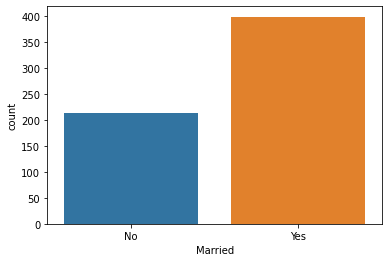

In [8]:
sns.countplot(x='Married',data=data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

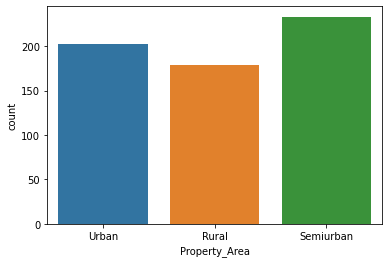

In [9]:
sns.countplot(x='Property_Area',data=data)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

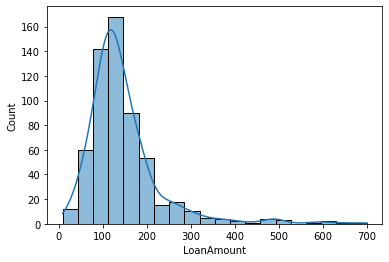

In [10]:
sns.histplot(data=data,x='LoanAmount',bins = 20,kde=True)
# Kde stands for Kernel Density Estimate, it is a method for visualizing the distribution of observations 
# in a dataset, KDE represents the data using a continuous probability density curve. 

## Handling Missing Values in the Dataset 

In [11]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data_rows, data_cols = data.shape[0],data.shape[1]
# Total number of cells 
data_cells = (data_rows * data_cols)
# missing number od cells in the dataset
data_missing = data.isnull().sum().sum()
print(f"Missing value percentage in dataset {round((data_missing/data_cells)*100,2)}%")

Missing value percentage in dataset 1.87%


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
# Create an instance of SimpleImputer with Strategy mean for Loan Amount and Loan Term 
imputer = SimpleImputer(strategy='mean')
data[['LoanAmount','Loan_Amount_Term']] = imputer.fit_transform(data[['LoanAmount','Loan_Amount_Term']])

In [15]:
# Create an instance of SimpleImputer with strategy 'most_frequent' for credit history, self employed
# dependents, gender and married 
imputer = SimpleImputer(strategy='most_frequent')
data[['Credit_History','Self_Employed','Dependents','Gender','Married']] = imputer.fit_transform(data[['Credit_History','Self_Employed','Dependents','Gender','Married']])

### Checking for Outliers in the Data 

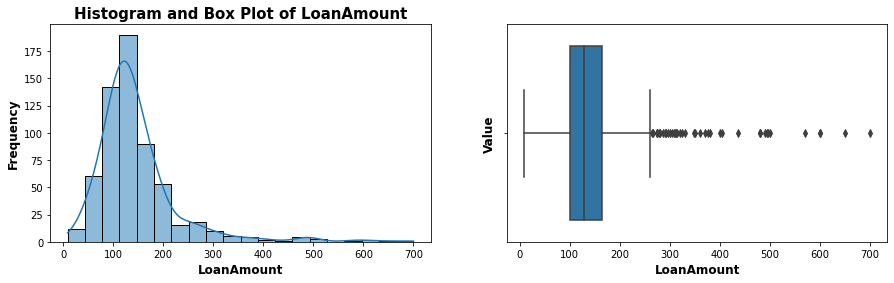

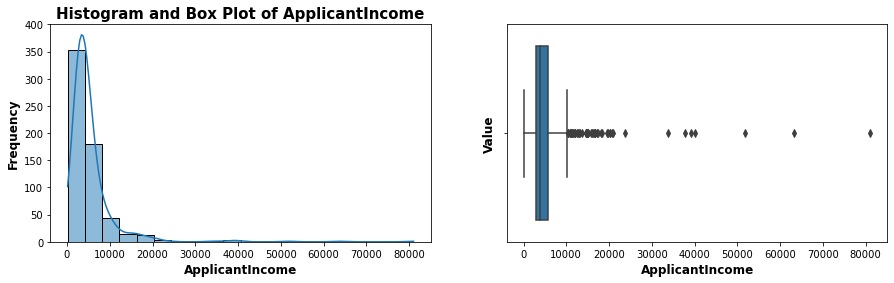

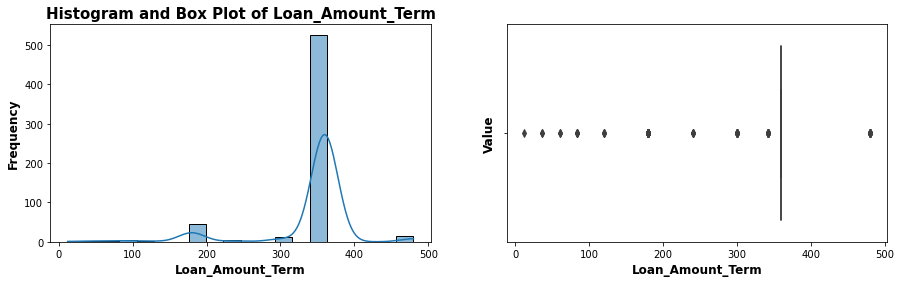

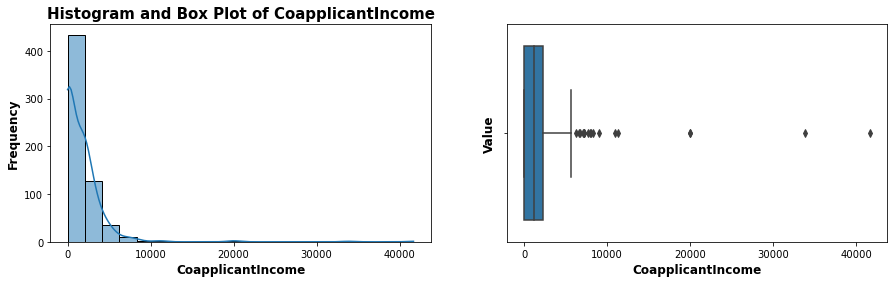

In [16]:
# Creating a list including the columns that have outliers 
col_outlier = ['LoanAmount','ApplicantIncome','Loan_Amount_Term','CoapplicantIncome']
# Creating a function of visualizing outliers using box plot and density plots 
def plot_hist_box(data,column):
    fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,4))
    sns.histplot(data=data,x=column,bins=20,kde=True,ax=ax1)
    sns.boxplot(data=data,x=column,ax=ax2)
    ax1.set_title(f"Histogram and Box Plot of {column}",size=15,weight='bold')
    ax1.set_xlabel(column,size=12,weight='bold')
    ax1.set_ylabel("Frequency",size=12,weight='bold')
    ax2.set_xlabel(column,size=12,weight='bold')
    ax2.set_ylabel("Value",size=12,weight='bold')
    plt.show()

#showing all the columns in one action
for col in col_outlier:
    plot_hist_box(data,col)

# Removing Outliers 

In [17]:
def remove_outliers(data,columns,k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k*iqr
        upper_bound = q3 + k*iqr
    return data

In [18]:
columns = ['LoanAmount','ApplicantIncome','Loan_Amount_Term','CoapplicantIncome']
data = remove_outliers(data,columns)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Hypothesis testing 
- Q1. Does the applicant's gender have an impact on loan approval rates? 
1. Null Hypothesis : The applicants gender does not have an impact on the loan approval rates
2. Alternate Hypothesis : The applicants gender has a significant impact on the loan approval rates

In [20]:
from scipy.stats import chi2_contingency

In [21]:
# Create a contingency table 
contingency_table = pd.crosstab(data['Gender'],data['Loan_Status'])

# Print the contingency table 
print(contingency_table)

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


In [22]:
# Perform chi square test 
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the p value 
print('p-value:',p_val)
if p_val >= 0.05:
    print('We accept the null hypothesis')
else: 
    print('We reject the null hypothesis')

p-value: 0.7391461310869638
We accept the null hypothesis


# 
- Q2. Is there any significant difference in loan approval rates between married and unmarried individuals ?
1. Null Hypothesis : 
2. Alternate Hypothesis : 

## 

- Q3. Does the loan amount have a significant impact on the loan approval rates?
1. Null Hypothesis : The loan amount does not have a significant impact on loan approval 
2. Alternate Hypothesis : The loan amount has a significant impact on the loan approval 

In [23]:
import statsmodels.api as sm

In [24]:
# Create binary outcome variable 
data_loan = data.copy()
data_loan['loan_approved'] = data_loan['Loan_Status'].map({'Y':1,'N':0})

# Fit logistic regression model 
X = data_loan[['LoanAmount']]
y = data_loan[['loan_approved']]
X = sm.add_constant(X) # add intercept term 
model = sm.Logit(y,X).fit()

# print model summary 
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.620599
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          loan_approved   No. Observations:                  614
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                0.001043
Time:                        10:39:43   Log-Likelihood:                -381.05
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                    0.3724
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9210      0.173      5.324      0.000       0.582       1.260
LoanAmount    -0.0009      0.

The logistic regression model shows that the loan amount does not have a significant impact on the loan approval as the p value is greater than 0.05 which is 0.368. Therefore, we accept the null hypothesis. 

## Building a few Machine Learning models 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == np.number:
        continue
    else:
        data[col] = le.fit_transform(data[col])

<ipython-input-26-65af851b9804>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number:


In [27]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,0,125,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,275,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,431,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,422,0.0,187.0,360.0,1.0,2,1
613,613,0,0,0,0,1,306,0.0,133.0,360.0,0.0,1,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

In [30]:
# drop the loan status from the final datafram to create the x variable 

X = data.drop('Loan_Status',axis=1)

# Assign 'Loan Status' column to the target variable y 

y = data['Loan_Status']

# Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [31]:
# Defining the classifiers 

classifiers = [
    LogisticRegression(),
    SVC(kernel='rbf',C=0.25, probability=True),
    DecisionTreeClassifier(random_state=40),
    RandomForestClassifier(random_state=40,n_estimators = 100),
    KNeighborsClassifier(),
]

In [35]:
results = []

for classifier in classifiers:
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Add results to list
    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })


C:\Users\nayanamenon1\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Convert results to pandas dataframe 
df_results = pd.DataFrame(results)

#Display results Dataframe 
print(df_results)

               Classifier  Accuracy  Precision  Recall        F1
0      LogisticRegression  0.788618   0.759615  0.9875  0.858696
1                     SVC  0.650407   0.650407  1.0000  0.788177
2  DecisionTreeClassifier  0.691057   0.756098  0.7750  0.765432
3  RandomForestClassifier  0.756098   0.750000  0.9375  0.833333
4    KNeighborsClassifier  0.626016   0.654545  0.9000  0.757895
